In [108]:
get_ipython().magic('load_ext autoreload')
get_ipython().magic('autoreload 2')

%matplotlib notebook
import matplotlib.pyplot as plt
#plt.ion()

import bimpy
from bimpy.analysis.caiman import readCaiman
from bimpy.analysis.caiman.bCaiman import getCaimanTrace
from bimpy.analysis.caiman.bCaiman import plotCaimanImage
from bimpy.analysis.caiman.bCaiman import plotCaimanTrace
from bimpy.analysis.caiman.bCaiman import caimanAnalyze


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:

# 2_nif_inferior_cropped_results
if 1:
    plotTheseComponents = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]
    path = '/media/cudmore/data/20201014/inferior/2_nif_inferior_cropped_aligned_results.hdf5'

# 3_nif_inferior_cropped_results
if 0:
    path = '/media/cudmore/data/20201014/inferior/3_nif_inferior_cropped_results.hdf5' 
    plotTheseComponents = [2, 3, 6, 7, 12, 13, 14, 15, 21, 22, 23, 24, 25, 27, 29, 30, 31, 32, 33, 34, 35, 39, 40, 41, 42, 43, 45, 53, 54, 55, 56, 63, 64, 65, 66, 67, 68, 71, 72, 73, 75, 76, 77, 79, 80, 81, 85, 87, 88, 89, 90, 92, 93, 95, 97, 98, 99, 100, 101, 103, 104, 105, 106, 107, 108, 112]

# DO NOT ANALYZE !!!
# 4_nif_inferior_cropped_results
if 0:
    plotTheseComponents = []
    path = '/home/cudmore/data/20201014/inferior/4_nif_inferior_cropped_results.hdf5'

caimanDict = readCaiman(path, verbose=False)



readCaiman() path: /media/cudmore/data/20201014/inferior/2_nif_inferior_cropped_aligned_results.hdf5
  numROI: 48


In [95]:
# list of superior
supFileList = [
    '/media/cudmore/data/20201014/superior/2_nif_superior_cropped_aligned_results.hdf5',
    '/media/cudmore/data/20201014/superior/3_nif_superior_cropped_aligned_results.hdf5',
    '/media/cudmore/data/20201014/superior/4_nif_superior_cropped_aligned_results.hdf5',
]
supTheseComponents = [
    [7, 8, 9, 10, 15, 16, 18, 19, 20, 21, 22, 23, 26, 27, 28, 29, 32, 35, 36, 50, 51, 55, 56, 57, 58, 59, 62, 66, 67, 71],
    [10, 11, 13, 19, 21, 28, 29, 31, 34, 35, 36, 38, 41, 42, 43, 44, 46, 47, 50, 51, 52, 53, 57, 59, 60, 61, 62, 64, 66, 67, 69, 70, 71, 72, 73, 74],
    [2, 3, 4, 5, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 22, 23, 24, 25, 28, 35, 37, 41, 43, 48, 50, 52, 54],
]

# load caiman dicts
supCaimanDictList = []
for idx, supFile in enumerate(supFileList):
    caimanDict = readCaiman(supFile, verbose=False)
    caimanDict['plotTheseComponents'] = supTheseComponents[idx]
    caimanDict['myName'] = 'sup'
    supCaimanDictList.append(caimanDict)

readCaiman() path: /media/cudmore/data/20201014/superior/2_nif_superior_cropped_aligned_results.hdf5
  originalShape: (1200, 1031)
  numROI: 72
readCaiman() path: /media/cudmore/data/20201014/superior/3_nif_superior_cropped_aligned_results.hdf5
  originalShape: (1192, 1056)
  numROI: 79
readCaiman() path: /media/cudmore/data/20201014/superior/4_nif_superior_cropped_aligned_results.hdf5
  originalShape: (1071, 690)
  numROI: 57


In [96]:
# list of inferior
infFileList = [
    '/media/cudmore/data/20201014/inferior/2_nif_inferior_cropped_aligned_results.hdf5',
    '/media/cudmore/data/20201014/inferior/3_nif_inferior_cropped_aligned_results.hdf5',
    #'/media/cudmore/data/20201014/inferior/4_nif_inferior_cropped_aligned_results.hdf5',
]
infTheseComponents = [
    #[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46],
    [0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46],
    [2, 3, 6, 7, 12, 13, 14, 15, 21, 22, 23, 24, 25, 27, 29, 30, 31, 32, 33, 34, 35, 39, 40, 41, 42, 43, 45, 53, 54, 55, 56, 63, 64, 65, 66, 67, 68, 71, 72, 73, 75, 76, 77, 79, 80, 81, 85, 87, 88, 89, 90, 92, 93, 95, 97, 98, 99, 100, 101, 103, 104, 105, 106, 107, 108, 112],
    [],
]

# load caiman dicts
infCaimanDictList = []
for idx, infFile in enumerate(infFileList):
    caimanDict = readCaiman(infFile, verbose=False)
    caimanDict['plotTheseComponents'] = infTheseComponents[idx]
    caimanDict['myName'] = 'inf'
    infCaimanDictList.append(caimanDict)

readCaiman() path: /media/cudmore/data/20201014/inferior/2_nif_inferior_cropped_aligned_results.hdf5
  originalShape: (1200, 456)
  numROI: 48
readCaiman() path: /media/cudmore/data/20201014/inferior/3_nif_inferior_cropped_aligned_results.hdf5
  originalShape: (1200, 950)
  numROI: 115


In [142]:
# do analysis
thresh = 0.07 #0.1 #0.08
refractoryPoints = 10

thisCaimanDictList = supCaimanDictList
#thisCaimanDictList = infCaimanDictList

for idx, caimanDict in enumerate(thisCaimanDictList):
    plotTheseComponents = supTheseComponents[idx]
    roiIdxList, rawPlotList, spikeTimeList = caimanAnalyze(caimanDict, plotTheseComponents=plotTheseComponents, 
                                                        thresh=thresh, refractoryPoints=refractoryPoints)

    numROI = len(roiIdxList)
    numFrames = len(rawPlotList[0])
    totSpikes = 0
    for spikeTimes in spikeTimeList:
        nSpikes = len(spikeTimes)
        totSpikes += nSpikes
    meanNumSpikes = totSpikes / numROI
    
    print(f"{caimanDict['myName']} numROI:{numROI}, numFrames:{numFrames}, meanNumSpikes:{meanNumSpikes}")
          

sup numROI:30, numFrames:1000, meanNumSpikes:4.033333333333333
sup numROI:36, numFrames:1000, meanNumSpikes:5.194444444444445
sup numROI:27, numFrames:1000, meanNumSpikes:3.814814814814815


In [143]:
# do analysis
thresh = 0.07 #0.1 #0.08
refractoryPoints = 10

#thisCaimanDictList = supCaimanDictList
thisCaimanDictList = infCaimanDictList

for idx, caimanDict in enumerate(thisCaimanDictList):
    plotTheseComponents = infTheseComponents[idx]
    roiIdxList, rawPlotList, spikeTimeList = caimanAnalyze(caimanDict, plotTheseComponents=plotTheseComponents, 
                                                        thresh=thresh, refractoryPoints=refractoryPoints)

    numROI = len(roiIdxList)
    numFrames = len(rawPlotList[0])
    totSpikes = 0
    for spikeTimes in spikeTimeList:
        nSpikes = len(spikeTimes)
        totSpikes += nSpikes
    meanNumSpikes = totSpikes / numROI
    
    print(f"{caimanDict['myName']} numROI:{numROI}, numFrames:{numFrames}, meanNumSpikes:{meanNumSpikes}")


inf numROI:43, numFrames:1000, meanNumSpikes:5.465116279069767
inf numROI:66, numFrames:1000, meanNumSpikes:6.4393939393939394


<IPython.core.display.Javascript object>


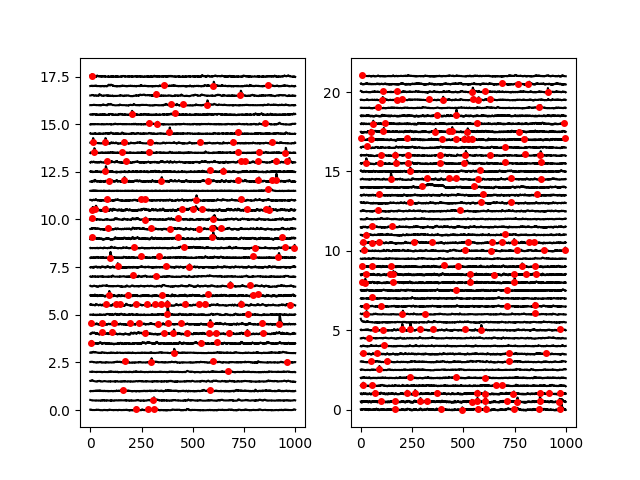

plotCaimanTrace() is plotting 36 components
plotCaimanTrace() is plotting 43 components


In [99]:
# plot sample inf/sup side by side
thresh = 0.12
thresh = 0.08

fig, axs = plt.subplots(1, 2)

# superior
idx = 1
caimanDict = supCaimanDictList[idx]
plotTheseComponents = supTheseComponents[idx]

plotCaimanTrace(caimanDict, thresh=thresh, plotTheseComponents=plotTheseComponents, ax=axs[0])

# inferior
idx = 0
caimanDict = infCaimanDictList[idx]
plotTheseComponents = infTheseComponents[idx]

plotCaimanTrace(caimanDict, thresh=thresh, plotTheseComponents=plotTheseComponents, ax=axs[1])

<IPython.core.display.Javascript object>


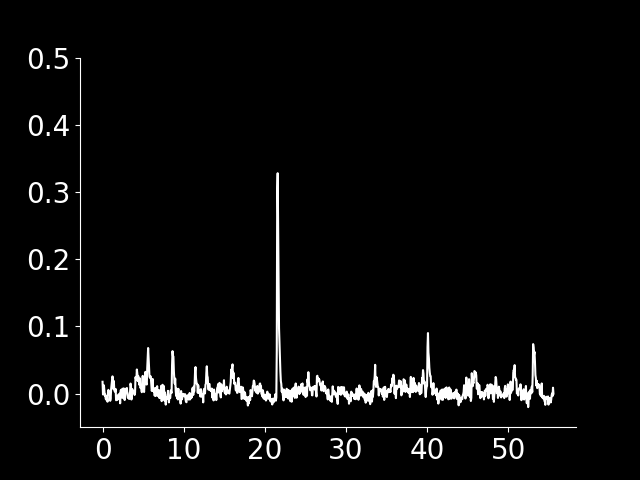

<IPython.core.display.Javascript object>


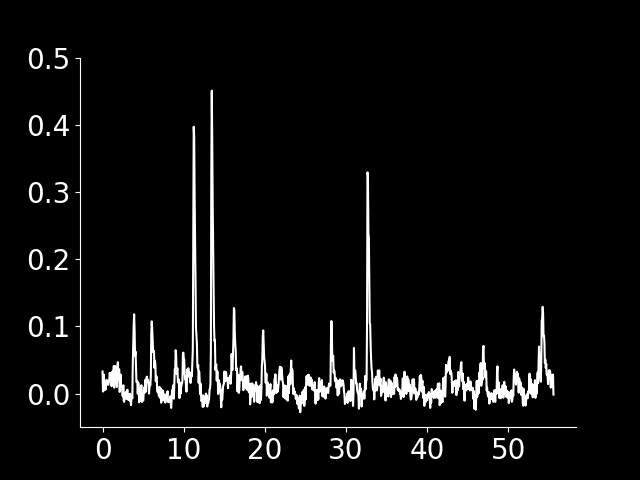

In [141]:
# superior, file idx 1, the 30th trace (from 1) has 1 spike
# inferior, file idx 0, the 11th trace (from 1) has 3 spikes

# plot single trace side by side

thresh = 0.12
dt = 0.0556

plt.ioff()


#
# superior
idx = 1
caimanDict = supCaimanDictList[idx]
plotTheseComponents = supTheseComponents[idx]
plotTheseComponents = [plotTheseComponents[30-1]]

#plotCaimanTrace(caimanDict, thresh=thresh, plotTheseComponents=plotTheseComponents, ax=axs[0])
#plotCaimanTrace(caimanDict, thresh=thresh, plotTheseComponents=plotTheseComponents)


if 1:
    caimanTrace, spikeTimes = getCaimanTrace(caimanDict,plotTheseComponents[0])
    xData = [x*dt for x in range(len(caimanTrace))]

    plt.style.use('dark_background')
    fig, axs = plt.subplots(1, 1)

    # reduce the number of ticks
    plt.locator_params(axis='y', nbins=6)
    plt.locator_params(axis='x', nbins=7)

    plt.plot(xData, caimanTrace, 'w')
    plt.ylim(-.05, .5)
    axs.spines['right'].set_visible(False)
    axs.spines['top'].set_visible(False)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    fig1 = plt.gcf()
    fig1.savefig('/media/cudmore/data/spark-grant/sup_example.eps')

    plt.show()

#
# inferior
if 1:
    idx = 0
    caimanDict = infCaimanDictList[idx]
    plotTheseComponents = infTheseComponents[idx]
    plotTheseComponents = [plotTheseComponents[11-1]]

    #plotCaimanTrace(caimanDict, thresh=thresh, plotTheseComponents=plotTheseComponents, ax=axs[1])
    #plotCaimanTrace(caimanDict, thresh=thresh, plotTheseComponents=plotTheseComponents)

    caimanTrace, spikeTimes = getCaimanTrace(caimanDict,plotTheseComponents[0])
    xData = [x*dt for x in range(len(caimanTrace))]

    plt.style.use('dark_background')
    fig, axs = plt.subplots(1, 1)

        # reduce the number of ticks
    plt.locator_params(axis='y', nbins=6)
    plt.locator_params(axis='x', nbins=7)

    plt.plot(xData, caimanTrace, 'w')
    plt.ylim(-.05, .5)
    axs.spines['right'].set_visible(False)
    axs.spines['top'].set_visible(False)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    fig2 = plt.gcf()
    fig2.savefig('/media/cudmore/data/spark-grant/inf_example.eps')

    plt.show()



plotCaimanTrace() is plotting 36 components


<IPython.core.display.Javascript object>


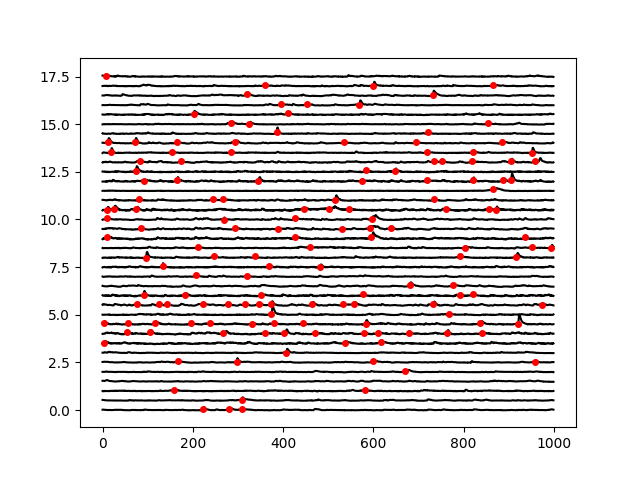

In [66]:

# plot one trace

idx = 1
thresh = 0.08
caimanDict = supCaimanDictList[idx]
plotTheseComponents = supTheseComponents[idx]

plotCaimanTrace(caimanDict, thresh=thresh, plotTheseComponents=plotTheseComponents, ax=None)

<IPython.core.display.Javascript object>


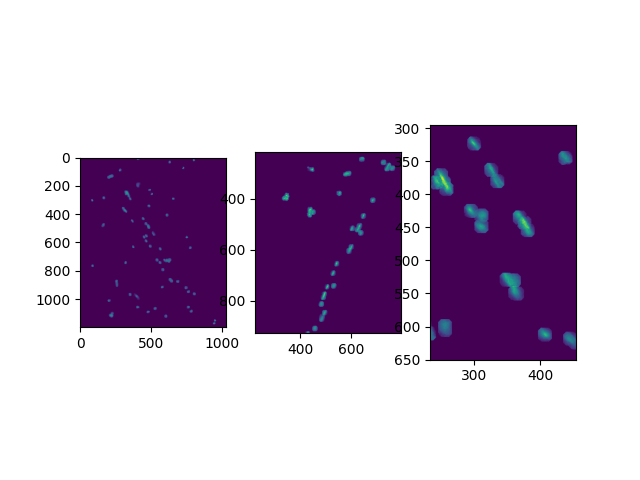

plotCaimanImage() is plotting 72 components
plotCaimanImage() is plotting 79 components
plotCaimanImage() is plotting 57 components


In [47]:

thisCaimanDictList = supCaimanDictList

nPlot = len(supCaimanDictList)
fig, axs = plt.subplots(1, nPlot)

for idx, caimanDict in enumerate(supCaimanDictList):
    plotTheseComponents = supTheseComponents[idx]
    plotCaimanImage(caimanDict, plotTheseComponents=plotTheseComponents, ax=axs[idx])


<IPython.core.display.Javascript object>


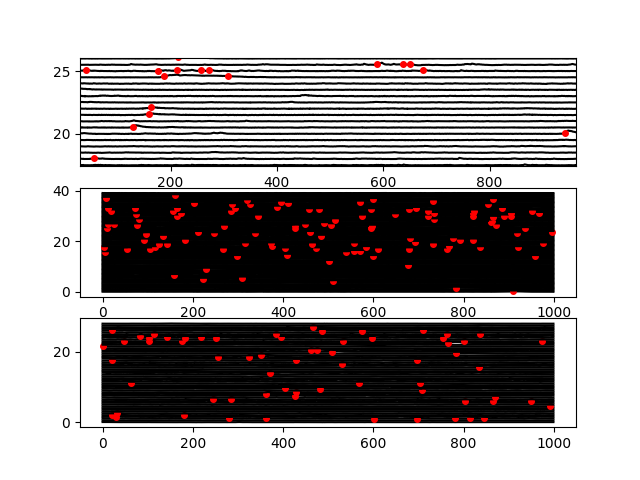

plotCaimanTrace() is plotting 72 components
plotCaimanTrace() is plotting 79 components
plotCaimanTrace() is plotting 57 components


In [51]:
thresh = 0.1 # thresh in final f/f_0

nPlot = len(supCaimanDictList)
fig, axs = plt.subplots(nPlot,1)

for idx, caimanDict in enumerate(supCaimanDictList):
    plotTheseComponents = supTheseComponents[idx]
    plotCaimanTrace(caimanDict, thresh=thresh, plotTheseComponents=plotTheseComponents, ax=axs[idx])


In [ ]:
# plot aligned spikes
caimanAlignSpikes(caimanDict, plotTheseComponents=None, thresh=0.1, refractoryPoints=10):
